In [1]:
import psycopg2
from dotenv import load_dotenv
import os
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
CURR_DIR=os.getcwd()
print(CURR_DIR)
env_file_path=os.path.join(os.path.dirname(CURR_DIR), '.env')
print(env_file_path)

# load the environment variables
load_dotenv(env_file_path)
env=os.environ

DBNAME=env.get('DBNAME')
USERNAME=env.get('USERNAME')
PASSWORD=env.get('PASSWORD')
HOSTNAME=env.get('HOSTNAME')
PORT=env.get('PORT')
SCHEMA=env.get('SCHEMA')
print(f"Schema : {SCHEMA}")
print(f"DBName: {DBNAME} HOSTNAME: {HOSTNAME}")

/Users/dare_devil/Desktop/MLDS_2024/Quarter1/Everything_Starts_With_Data/MLDS_400_G11/DataCleaning
/Users/dare_devil/Desktop/MLDS_2024/Quarter1/Everything_Starts_With_Data/MLDS_400_G11/.env
Schema : group_11
DBName: everything2023 HOSTNAME: pg.analytics.northwestern.edu


In [3]:
# Establish the connection
conn = psycopg2.connect(
    dbname=DBNAME,
    user=USERNAME,
    password=PASSWORD,
    host=HOSTNAME,
    port=PORT
)

# Create a cursor object to interact with the database
cur = conn.cursor()

# Setting the SearchPath to Group Schema
cur.execute(f"SET search_path TO {SCHEMA};")

In [4]:
# Getting Data from DeptInfo
cur.execute("SELECT * FROM deptinfo;")
column_names = [desc[0] for desc in cur.description]
print(column_names)

rows = cur.fetchall()
df_deptinfo = pd.DataFrame(rows, columns=column_names)
df_deptinfo.head()

['DEPT', 'DEPTDESC']


,DEPT,DEPTDESC
0,800,CLINIQUE
1,801,LESLIE
2,1100,GARY F
3,1107,JACQUES
4,1202,CABERN


In [5]:
# Getting Data from Skstinfo
cur.execute("SELECT * FROM skstinfo;")
column_names = [desc[0] for desc in cur.description]
print(column_names)

rows = cur.fetchall()
df_skstinfo = pd.DataFrame(rows, columns=column_names)
df_skstinfo.head()

['SKU', 'STORE', 'COST', 'RETAIL']


,SKU,STORE,COST,RETAIL
0,3,102,123.36,440.0
1,3,103,123.36,440.0
2,3,104,123.36,440.0
3,3,202,123.36,440.0
4,3,203,123.36,440.0


In [8]:
# Getting Data from skutinfo
cur.execute("SELECT * FROM skuinfo;")
column_names = [desc[0] for desc in cur.description]
print(column_names)

rows = cur.fetchall()
df_skuinfo = pd.DataFrame(rows, columns=column_names)
df_skuinfo.head()

['SKU', 'DEPT', 'CLASSID', 'UPC', 'STYLE', 'COLOR', 'SIZE', 'PACKSIZE', 'VENDOR', 'BRAND']


,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND
0,3,6505,113,400000003000,00 F55KT2,WHISPERWHITE,P8EA,1,5119207,TURNBURY
1,4,8101,002,400000004000,22 615CZ4,SPEARMI,S,1,3311144,C A SPOR
2,5,7307,003,400000005000,7LBS 245-01,34 SILVER,KING,1,5510554,BEAU IDE
3,8,3404,00B,400000008000,622 F05H84,MORNING MI,2T,1,2912827,HARTSTRI
4,15,2301,004,400000015000,126 MDU461,255CAMEL,12,1,23272,JONES/LA


In [9]:
# Getting Data from strinfo
cur.execute("SELECT * FROM strinfo;")
column_names = [desc[0] for desc in cur.description]
print(column_names)

rows = cur.fetchall()
df_strinfo = pd.DataFrame(rows, columns=column_names)
df_strinfo.head()

['STORE', 'CITY', 'STATE', 'ZIP']


,STORE,CITY,STATE,ZIP
0,2,ST. PETERSBURG,FL,33710
1,3,ST. LOUIS,MO,63126
2,4,LITTLE ROCK,AR,72201
3,7,FORT WORTH,TX,76137
4,9,TEMPE,AZ,85281


In [10]:
# Getting Data from trnsact
cur.execute("SELECT * FROM trnsact ORDER BY RANDOM() LIMIT 5000000;")
column_names = [desc[0] for desc in cur.description]
print(column_names)

rows = cur.fetchall()
df_trnsact = pd.DataFrame(rows, columns=column_names)
df_trnsact.head()

['SKU', 'STORE', 'REGISTER', 'TRANNUM', 'SEQ', 'SALEDATE', 'STYPE', 'QUANTITY', 'ORGPRICE', 'SPRICE', 'AMT', 'INTERID', 'MIC']


,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC
0,3728694,7307,200,2200,0,2005-08-13,P,1,28.00,7.00,7.00,51300110,176
1,2246384,9603,270,4300,928506924,2004-12-05,P,1,24.99,19.99,19.99,55100095,788
2,7172157,5103,720,2400,393405922,2004-08-02,P,1,25.00,6.25,6.25,559600025,305
3,4866280,9002,370,7600,0,2005-02-04,P,1,58.00,39.99,39.99,20600059,282
4,3577284,802,180,1000,540305805,2005-06-22,P,1,40.00,10.00,10.00,448500023,860


# Department Table

Columns Description
- DEPT: Department where the stock item belong
- DEPTDESC: Description of the department

In [15]:
df_deptinfo.head(5)

,DEPT,DEPTDESC
0,800,CLINIQUE
1,801,LESLIE
2,1100,GARY F
3,1107,JACQUES
4,1202,CABERN


In [32]:
for column in df_deptinfo.columns:
    print(column, df_deptinfo[column].dtype)

DEPT int64
DEPTDESC object


In [33]:
df_deptinfo.DEPTDESC.unique().shape[0], df_deptinfo.DEPT.unique().shape[0]

(60, 60)

In [34]:
unique_departments = df_deptinfo.DEPT.unique()
print(f"Total Unique Departments : {len(unique_departments)}")

Total Unique Departments : 60


In [20]:
for dept_name in df_deptinfo.DEPTDESC.unique():
    assert len(dept_name) == len(dept_name.strip()), f"Found Empty Spaces in {dept_name}"

# Skuinfo Table

**Columns Description**:
- SKU: Stock Keeping Unit number of the stock item
- DEPT: Department where the stock item belong
- CLASSID: Stock Item Classification
- UPC: Universal Product Code for the stock item 
- STYLE: The specific style of the stock item 
- COLOR: The color of the stock item
- SIZE: The size of the stock item
- PACKSIZE: The quantity of item per pack
- VENDOR: The vendor number of the stock item
- BRAND: The brand name of the stock item

**Insights**
- The SKU Table contains unique Stock IDs (SKU). No Repetition is there 
- Total Unique Stocks : 1556039

In [37]:
for column in df_skuinfo.columns:
    print(column, df_skuinfo[column].dtype)

SKU int64
DEPT int64
CLASSID object
UPC int64
STYLE object
COLOR object
SIZE object
PACKSIZE int64
VENDOR int64
BRAND object


In [38]:
df_skuinfo.head()

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND
0,3,6505,113,400000003000,00 F55KT2,WHISPERWHITE,P8EA,1,5119207,TURNBURY
1,4,8101,002,400000004000,22 615CZ4,SPEARMI,S,1,3311144,C A SPOR
2,5,7307,003,400000005000,7LBS 245-01,34 SILVER,KING,1,5510554,BEAU IDE
3,8,3404,00B,400000008000,622 F05H84,MORNING MI,2T,1,2912827,HARTSTRI
4,15,2301,004,400000015000,126 MDU461,255CAMEL,12,1,23272,JONES/LA


In [53]:
# Checking for null values
df_skuinfo.isnull().sum()

SKU         0
DEPT        0
CLASSID     0
UPC         0
STYLE       0
COLOR       0
SIZE        0
PACKSIZE    0
VENDOR      0
BRAND       0
dtype: int64

In [57]:
# Unique Values of all the Columns
print(f"DataSize: {df_skuinfo.shape[0]}")
df_skuinfo.nunique()

DataSize: 1556039


SKU         1556039
DEPT             60
CLASSID        1055
UPC         1556039
STYLE        315131
COLOR         71321
SIZE           9783
PACKSIZE         48
VENDOR         2353
BRAND          1931
dtype: int64

In [14]:
for brand in df_skuinfo.BRAND.unique():
    print(brand)

TURNBURY
C A SPOR
BEAU IDE
HARTSTRI
JONES/LA
BROWN SH
EMMA JAM
AMERICAN
SIGRID O
KIDS HEA
ENZO ANG
LOLLYTOG
FU DA IN
NINE WES

ME TOO
NOBILITY
RALPH LA
M.M. & R
LA BELLE
GABAR IN
THE UNIT
SAN FRAN
E.W.L. S
FLAPDOOD
OLD SCHO
MICA JEW
DANNY &
NIKE INC
DUTCH LL
CALVIN K
MANHATTA
GUESS AL
SUSAN BR
BECHAMEL
HASKELL
MOA MOA
PERISCOP
TRUE MEA
JESSICA
WRAPPER/
UNISA AM
POLO FAS
KORET OF
POSITIVE
NORTHERN
XOXO
CAROL DA
LIZ CLAI
JOLIE IN
L.C. FOO
JERELL /
TRENDS/G
ROUNDTRE
LUCKY BR
MAIN ING
TRAVIS A
REAL AME
ECHO DES
FRANCO S
NEXT MAR
VITTADIN
DANA-CO.
TIMBERLA
K STUDIO
CWF USA
BB CO I
TAHARI/A
DIM
LANCOME
PEERLESS
NINA FOO
INTERNAT
TELLURID
MURANO
BYER CAL
ICM L.L.
DAX CORP
WILD WES
VICTORIA
I.C. ISA
DONISA I
TWO BAR
ALPHA GA
M I A
FOOTWEAR
APPAREL
CABERNET
KENNETH
ERICA LY
COMPLETE
9 WEST
VESI
ALL ACCE
JODY CAL
CARESSA
JH COLLE
SKINNY M
SARA LEE
REALITEE
URBAN ME
NAUTICA
NAPIER/V
MAD ENGI
SHADOWLI
BALI/HEN
AUTHENTI
TOMMY HI
F-50 LL
SEAN JOH
AGB
GIANT ME
BETSEY J
NEVADA A
CONNECTE
MULBERRI
E.C.

In [73]:
# brand_packsize = df_skuinfo.groupby('BRAND')['PACKSIZE'].mean().reset_index()

# # Sorting the data to show brands with the highest average pack size at the top k averages
# k = 50
# brand_packsize = brand_packsize.sort_values(by='PACKSIZE', ascending=False)[:k]

# # Plotting
# plt.figure(figsize=(12, 8))
# sns.barplot(x='PACKSIZE', y='BRAND', data=brand_packsize, palette='viridis')
# plt.title('Trend of PACKSIZE with Different Brands')
# plt.xlabel('Average PACKSIZE')
# plt.ylabel('BRAND')
# plt.tight_layout()
# plt.show()

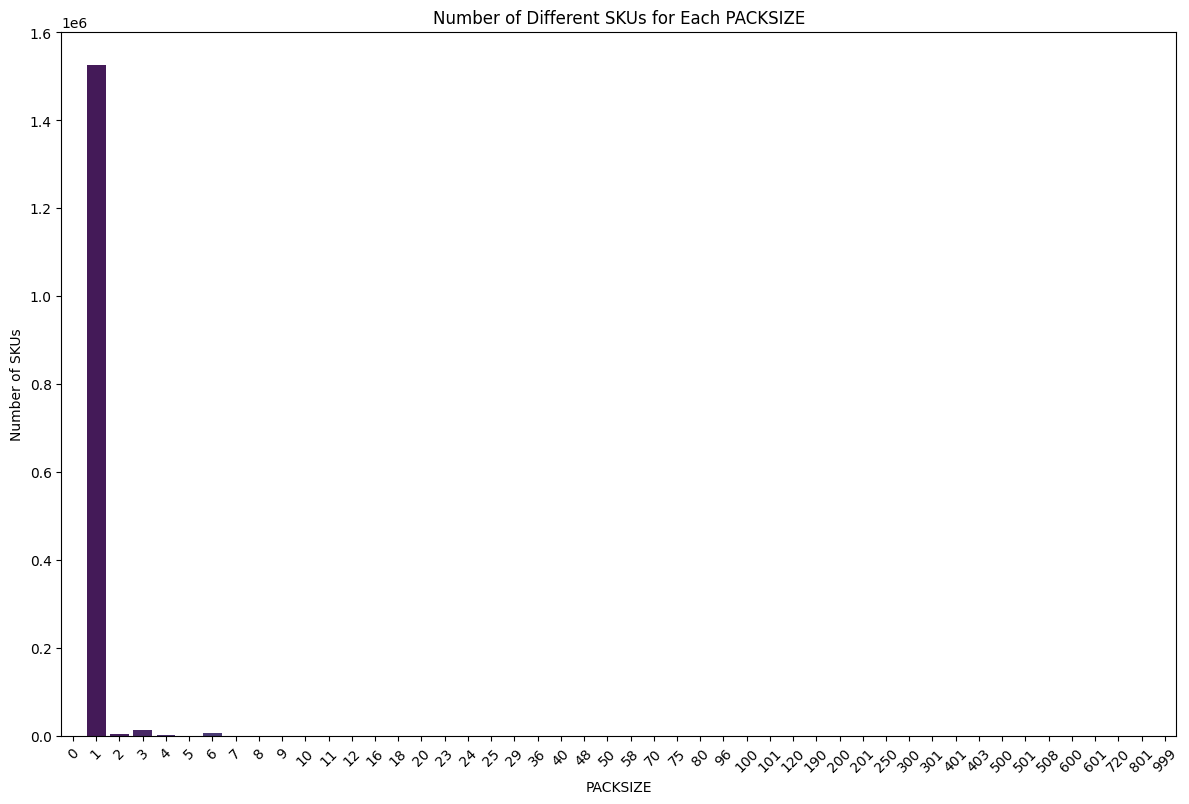

In [71]:
packsize_sku_counts = df_skuinfo.groupby('PACKSIZE')['SKU'].nunique().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='PACKSIZE', y='SKU', data=packsize_sku_counts, palette='viridis')
plt.title('Number of Different SKUs for Each PACKSIZE')
plt.xlabel('PACKSIZE')
plt.ylabel('Number of SKUs')
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# STRINFO 
Store Information

Column Descriptions:
- STORE: Store Number
- CITY : City Name
- STATE : State Name
- ZIP : Zip Code

In [96]:
df_strinfo.isnull().sum()

STORE    0
CITY     0
STATE    0
ZIP      0
dtype: int64

In [83]:
print(f"Distinct Value Counts for Column Names")
for col_name, val in df_strinfo.nunique().to_dict().items():
    print(f"{col_name} : {val}")

Distinct Value Counts for Column Names
STORE : 453
CITY : 299
STATE : 31
ZIP : 391


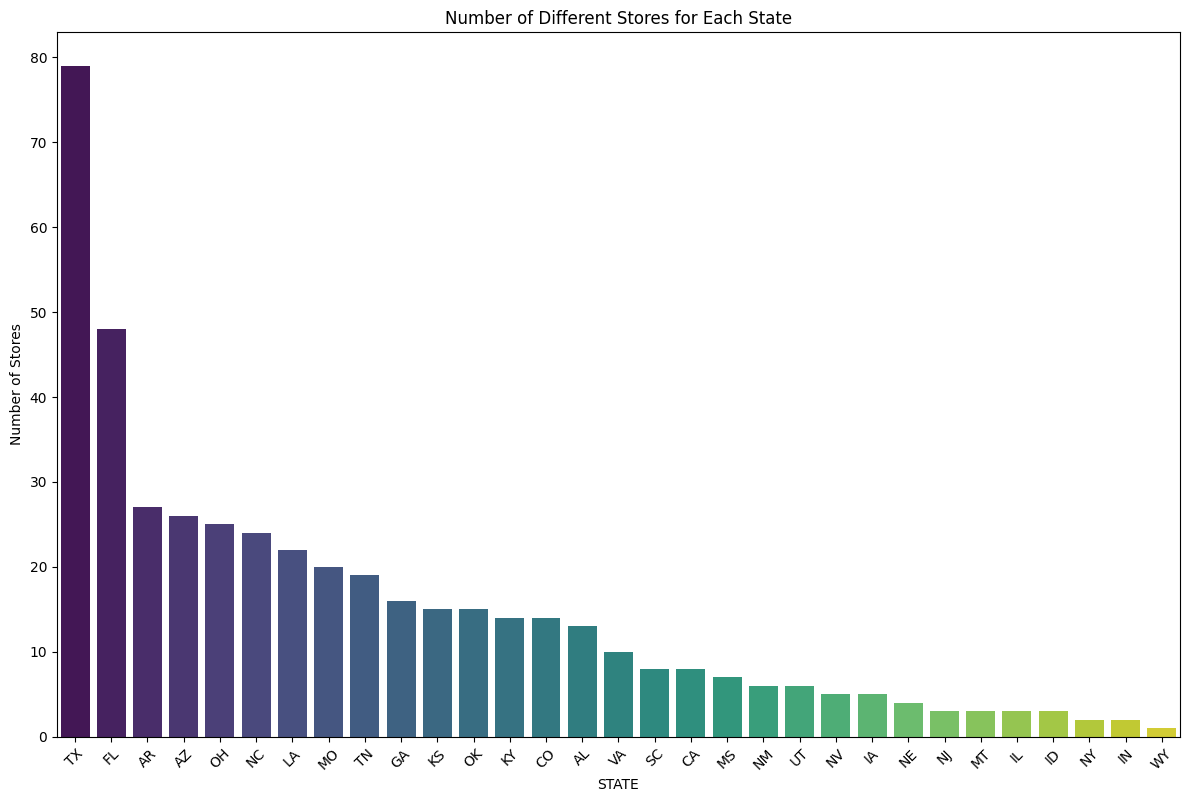

In [95]:
state_store_counts = df_strinfo.groupby('STATE')['STORE'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE', y='STORE', data=state_store_counts, palette='viridis')
plt.title('Number of Different Stores for Each State')
plt.xlabel('STATE')
plt.ylabel('Number of Stores')
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

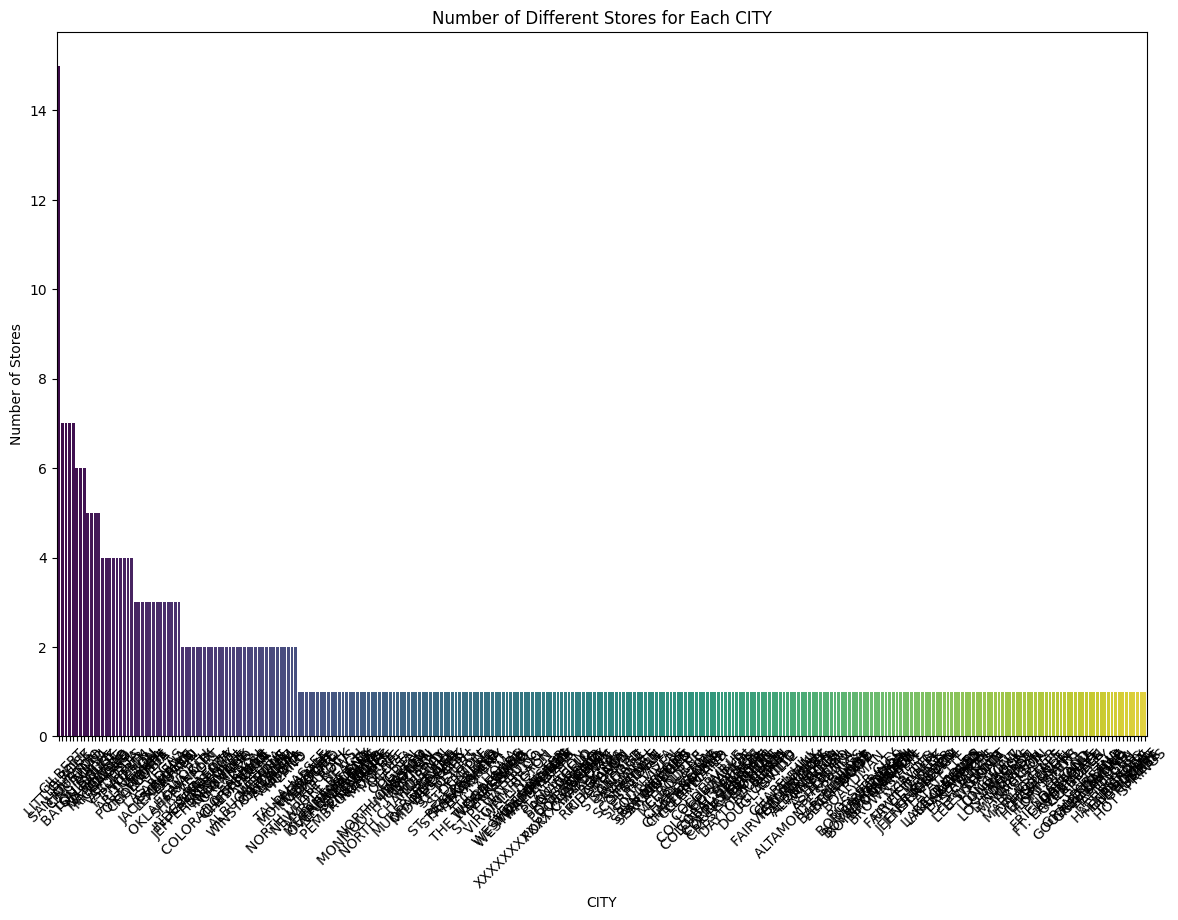

In [100]:
city_store_counts = df_strinfo.groupby('CITY')['STORE'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='CITY', y='STORE', data=city_store_counts, palette='viridis')
plt.title('Number of Different Stores for Each CITY')
plt.xlabel('CITY')
plt.ylabel('Number of Stores')
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# SKSTINFO

Columns Description
- SKU : Stock Keeping Unit number of the stock item
- STORE : Store Number
- COST : Cost Price of the Stock
- RETAIL : Selling Price of the Stock

Some Insights:
- 395409 Stocks are actually sold at Stores with cost and retail price
- SKUs with Zero Cost and Retail : 1445
- SKUs with Zero Cost : 1495
- SKUs with Zero Retail : 1474


In [101]:
df_skstinfo.head()

,SKU,STORE,COST,RETAIL
0,3,102,123.36,440.0
1,3,103,123.36,440.0
2,3,104,123.36,440.0
3,3,202,123.36,440.0
4,3,203,123.36,440.0


In [102]:
df_skstinfo.isnull().sum()

SKU       0
STORE     0
COST      0
RETAIL    0
dtype: int64

In [148]:
df_skstinfo.SKU.unique().shape

(395409,)

In [113]:
sku_avg_cost = df_skstinfo.groupby('SKU')['COST'].mean().sort_values(ascending=False).reset_index()
sku_avg_cost.head(10)

,SKU,COST
0,1811281,1872.54
1,3678048,1854.96
2,4338048,1747.20
3,860149,1710.96
4,5168032,1651.20
5,159502,1638.24
6,920147,1464.00
7,1220149,1462.56
8,1099502,1420.56
9,969502,1420.56


In [114]:
sku_avg_cost.tail(10)

,SKU,COST
395399,1879389,0.0
395400,1127318,0.0
395401,3772914,0.0
395402,1471287,0.0
395403,3773115,0.0
395404,3774475,0.0
395405,4801484,0.0
395406,264195,0.0
395407,2523842,0.0
395408,2031335,0.0


In [115]:
sku_avg_retail = df_skstinfo.groupby('SKU')['RETAIL'].mean().sort_values(ascending=False).reset_index()
sku_avg_retail.head(10)

,SKU,RETAIL
0,1811281,5850.0
1,1220149,5280.0
2,969502,4320.0
3,159502,4320.0
4,569502,4320.0
5,1099502,4320.0
6,699502,4320.0
7,439502,4320.0
8,920147,4080.0
9,860149,4080.0


In [135]:
skus_avg_prices = sku_avg_cost.merge(sku_avg_retail, on='SKU', how='inner')
skus_avg_prices.head()

,SKU,COST,RETAIL
0,1811281,1872.54,5850.0
1,3678048,1854.96,2160.0
2,4338048,1747.20,2160.0
3,860149,1710.96,4080.0
4,5168032,1651.20,2280.0


In [139]:
skus_with_zero_cost_retail = skus_avg_prices[(skus_avg_prices.COST==0.0) & (skus_avg_prices.RETAIL==0.0)]
print(f"SKUs with Zero Cost and Retail : {skus_with_zero_cost_retail.shape[0]}")

skus_with_zero_cost = skus_avg_prices[(skus_avg_prices.COST==0.0)]
skus_with_zero_retail = skus_avg_prices[(skus_avg_prices.RETAIL==0.0)]
print(f"SKUs with Zero Cost : {skus_with_zero_cost.shape[0]}")
print(f"SKUs with Zero Retail : {skus_with_zero_retail.shape[0]}")

SKUs with Zero Cost and Retail : 1445
SKUs with Zero Cost : 1495
SKUs with Zero Retail : 1474


In [147]:
df_skstinfo.groupby('STORE')['SKU'].nunique().sort_values(ascending=False).reset_index()

,STORE,SKU
0,2203,113188
1,8402,109454
2,209,101766
3,9103,101533
4,1709,99356
...,...,...
350,7700,23
351,7300,22
352,300,7
353,400,7


In [145]:
df_skstinfo[df_skstinfo.STORE==2203].shape

(113188, 4)

# Trnsact

In [11]:
df_trnsact.head()

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC
0,3728694,7307,200,2200,0,2005-08-13,P,1,28.00,7.00,7.00,51300110,176
1,2246384,9603,270,4300,928506924,2004-12-05,P,1,24.99,19.99,19.99,55100095,788
2,7172157,5103,720,2400,393405922,2004-08-02,P,1,25.00,6.25,6.25,559600025,305
3,4866280,9002,370,7600,0,2005-02-04,P,1,58.00,39.99,39.99,20600059,282
4,3577284,802,180,1000,540305805,2005-06-22,P,1,40.00,10.00,10.00,448500023,860


In [25]:
for col in df_trnsact.columns:
    print(col, df_trnsact[col].dtype)

SKU int64
STORE int64
REGISTER int64
TRANNUM int64
SEQ int64
SALEDATE object
STYPE object
QUANTITY int64
ORGPRICE float64
SPRICE float64
AMT float64
INTERID int64
MIC int64
